# 분류
## 01 분류(Classification)의 개요 

[분류]<br>

학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 생성한 모델에 새로운 데이터 값을 주었을 때 미지의 레이블 값 예측<br>
즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별<br>
    
[앙상의 종류]<br>
1. 나이브 베이즈: 베이즈 통계와 생성 모델에 기반
2. 로지스틱 회귀: 독립변수와 종속변수의 선형 관계성에 기반
3. 결정 트리: 데이터 균일도에 따른 규칙 기반
4. 서포트 벡터 머신: 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
5. 최소근접 알고리즘: 근접 거리 기준
6. 신경망: 심층 연결 기반
7. 앙상블: 서로 같거나 다른 머신러닝 알고리즘을 결합
           정형 데이터 분석에서 사용
           -배깅 방식: 랜덤 포레스트(Random Forest)
           -부스팅 방식: 그래디언트 부스팅(Gradient Boosting)

## 02 결정트리

[결정 트리]<br>
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree)기반의 분류 규칙(ex. if/else)을 만드는 것<br>

#### 장점
1. 균일도를 기반으로 하기 때문에 쉽고 직관적
2. 룰이 매우 명확하여 규칙노드와 리프노드가 만들어지는 기준 파악 가능
3. 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음

#### 단점
1. 예측 성능을 향상시키기 위해 가지는 복잡한 규칙 구조가 과적합을 발생시켜 바낻로 예측 성능이 저하될 수 있음 

![nn](https://media.vlpt.us/images/dbj2000/post/9899931f-a1f1-4c00-bbbb-89d4834e1105/image.png)
루트노드: 트리구조가 시작되는 곳<br>
규칙노드: 규칙조건<br>
리프노드: 결정된 클래스 값<br>
서브트리: 새로운 규칙 조건마다 생성되는 트리<br>
트리의 깊이(depth)가 깊어질수록 결정트리의 예측 성능이 저하될 가능성이 높음<br>
(분류를 결정하는 방식 복잡 --> 과적합)<br>

#### 가능한 한 적은 결정 노드로 높은 예측 정확도를 갖기 위해서는 최대한 균일한 데이터 세트를 구성할 수 있도록 분할

[엔트로피, 정보이득지수, 지니계수]<br>
엔트로피: 주어진 데이터 집합의 혼잡도를 의미<br>
          값이 작을수록 데이터가 균일함(<->균일도:값이 클수록 데이터가 균일함)<br>
정보이득지수: 1 - 엔트로피지수; 정보이득이 좋은 속성을 기준으로 결정트리 분할<br>
지니계수: 평등(0)~불평등(1)<br>
          값이 작을수록 데이터가 균일함; 지니계수가 낮은 속성을 기준으로 분할<br>
          
### 결정 트리 파라미터 p188-189
min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수<br>
min_samples_leaf: 리프노드가 되기 위한 최소한의 샘플 데이터 수<br>
max_features: 최적의 분할을 위해 고려할 최대 피처의 수<br>
max_depth: 트리의 최대 깊이<br>
max_leaf_nodes: 리프노드의 최대 수<br>

### 결정 트리 모델의 시각화

[Graphviz 패키지 이용]


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11) 
#test_size = test데이터의 비율 고정, random_state = 난수 값 고정

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [10]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/graphviz-2.44.1-win32/Graphviz/bin/'
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)
#Impurity가 True일 경우 각 노드의 불순물을 표시
#filled는 True일 경우 분류를 위한 다수 클래스, 회귀 값의 극한 또는 다중 출력의 노드 순도를 나타내기 위해 노드를 색칠

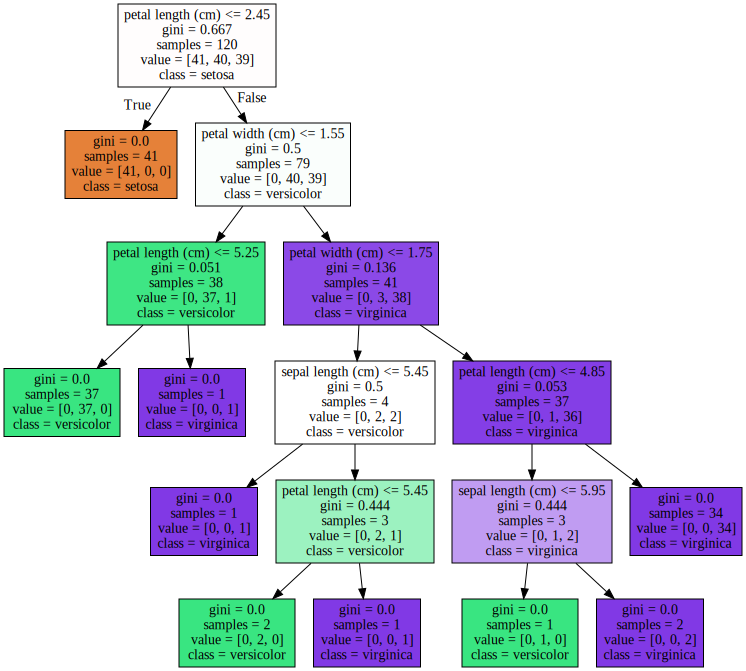

In [11]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

[노드 구성]

petal length(꽃잎 길이) ≤ 2.45

    자식노드를 만들기 위한 규칙조건 (없으면 리프노드라는 증거!)
    꽃잎 길이가 2.45 이하인 데이터와 초과인 데이터로 분류하겠다는 의미
    
gini = 0.666

    지니계수
    아래의 value 분포도를 통해 계산
    높을수록 데이터 불균일
    
samples = 120

    아직 아무런 조건으로도 나뉘어있지 않은 상황
    세 품종 데이터 전체 갯수가 120개
    
value = [38, 41, 41]

    품종 순서대로 Setosa 50개, Versicolor 50개, Virginica50개라는 의미
    리스트 안의 값을 모두 더하면 samples의 개수와 같음
    
class = versicolor

    하위 노드를 가질경우 value에서 가장 많은 값의 품종선택
    여기서는 versicolor = virginica 50으로 같으므로 인덱스 작은것 선택
    
    
[노드 색깔]

붓꽃 데이터의 레이블 값을 의미
색깔이 짙어질수록 지니계수가 작아 데이터가 균일하고 해당 레이블에 속하는 샘플이 많음

주황색: 0 : Setosa
초록색: 1 : Versicolor
보라색: 2 : Virginica

주황색 노드의 경우 전체 41개의 샘플이 모두 Setosa로 균일한 상태

### 하이퍼 파라미터 변경에 따른 결정 트리 변화
1. max_depth
2. min_samples_split
3. min_samples_leaf

[max_depth]
적절히 설정; 너무 깊어도(복잡해도), 너무 간단해도 성능이 좋지 않을 것

In [12]:
# DecicionTreeClassifier 생성 (max_depth = 3 으로 제한)
dt_clf = DecisionTreeClassifier(max_depth=3 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

print('max_depth=3인 경우의 Decision Tree 시각화')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

print('max_depth를 3으로 제한한 결과 처음보다 간결한 형태의 트리가 만들어짐')

max_depth=3인 경우의 Decision Tree 시각화
max_depth를 3으로 제한한 결과 처음보다 간결한 형태의 트리가 만들어짐


[min_samples_split]

기본 설정값은 2
현재 sample이 2개이고, 두 개가 다른 품종이라면 자식노드를 만들어 분할해야함

하지만 파라미터를 4로 변경하면 샘플이 다른 품종이 섞인 3개 여도 분할을 멈추고 리프노드가 됨

따라서 트리 깊이 감소

In [13]:
# DecicionTreeClassifier 생성 (min_samples_split=4로 상향)
dt_clf = DecisionTreeClassifier(min_samples_split=4 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

print('min_samples_split=4인 경우의 Decision Tree 시각화')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
print('min_samples_split=4인데, Samples가 3개 이므로 서로 Class 값이 있어도 Split하지 않음')

min_samples_split=4인 경우의 Decision Tree 시각화
min_samples_split=4인데, Samples가 3개 이므로 서로 Class 값이 있어도 Split하지 않음


[min_samples_leaf]

리프노드가 될 수 있는 조건은 샘플수의 디폴트가 1

즉, 샘플이 하나 남아야 리프노드로 인정

하지만 그러면 트리의 리프노드는 너무 많아지고 더 복잡해짐

따라서 이 파라미터로 리프노드의 엄격했던 기준을 완화시킴

In [14]:
# DecicionTreeClassifier 생성 (min_samples_leaf=4로 상향)
dt_clf = DecisionTreeClassifier(min_samples_leaf=4 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

print('min_samples_leaf=4인 경우의 Decision Tree 시각화')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
print('Sample이 4 이상인 노드는 리프 클래스 노드가 될 수 있으므로 규칙이 sample 4인 노드를 만들 수 있는 상황을 반영하여 변경됨')

min_samples_leaf=4인 경우의 Decision Tree 시각화
Sample이 4 이상인 노드는 리프 클래스 노드가 될 수 있으므로 규칙이 sample 4인 노드를 만들 수 있는 상황을 반영하여 변경됨


### Feature Importance 시각화
학습을 통해 규칙을 정하는 데 있어 피처의 중요도를 DecisionTreeClassifier 객체의 featureimportances 속성으로 제공<br>
ndarray형태로 값을 반환하며 피처 순서대로 값이 할당<br>

Feature importances:
[0.006 0.    0.546 0.448]
sepal length (cm) : 0.006
sepal width (cm) : 0.000
petal length (cm) : 0.546
petal width (cm) : 0.448


<AxesSubplot:>

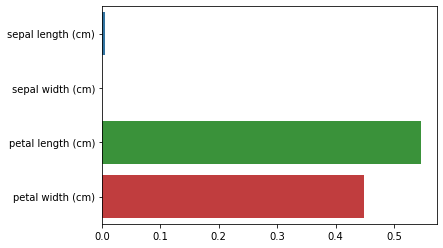

In [15]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

### 결정 트리 과적합(Overfitting)

임의의 데이터 세트


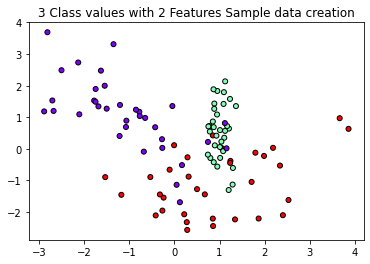

In [16]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline
print('임의의 데이터 세트')
plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

첫 번째 학습 시에는 결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 설정<br>
-> 결정 트리 모델이 어떤 결정 기준을 가지고 분할하면서 데이터 분류하는지 확인<br>

In [17]:
import numpy as np

print('결정 트리 결정 기준 경계 시각화')
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

결정 트리 결정 기준 경계 시각화


매우 얇은 영역으로 나타난 부분 = 이상치<br>
이상치까지 모두 분류하기 위해 분할한 결과 결정 기준 경계가 많아짐<br>
→조금만 형태가 다른 데이터가 들어와도 정확도가 매우 떨어짐<br>

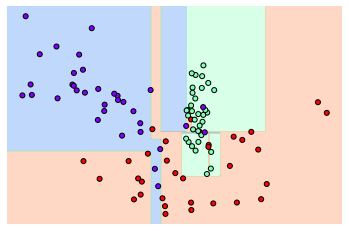

In [18]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

default 값으로 실행한 앞선 경우보다 이상치에 크게 반응하지 않음<br>
일반화된 분류 규칙에 의해 분류되었음을 확인<br>

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트
30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터
(https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)

#### 수집된 피처 세트를 기반으로 어떠한 동작인지 예측
feature_info.txt 과 README.txt : 데이터 세트와 피처에 대한 간략한 설명
features.txt : 피처의 이름 
activity_labels.txt : 동작 레이블 값에 대한 설명

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [20]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.<br>
중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성<br>

In [21]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [22]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [23]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [24]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


레이블 값은 1, 2, 3, 4, 5, 6의 6개의 값이고 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분포

#### default로 예측 수행

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


#### max_depth가 정확도에 주는 영향

In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [27]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [28]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


#### max_depth와 min_samples_split 를 변경하여 성능 튜닝

In [29]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [30]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


#### 피처의 중요도 시각화 : featureimportances

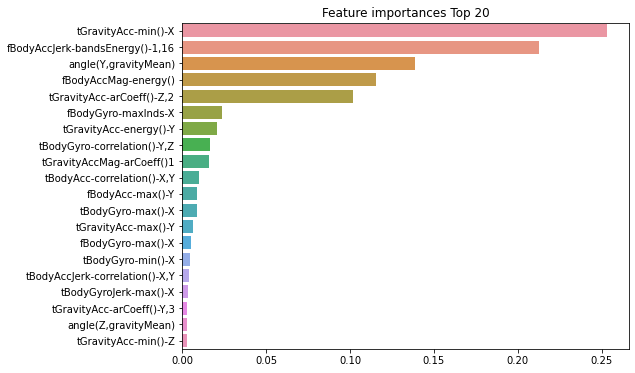

In [31]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## 03 앙상블 학습

### 앙상블 학습 개요
[앙상블 학습]<br>
여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
ex. 집단 지성으로 어려운 문제 해결

이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보임
대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타냄

앙상블 학습의 유형: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking) 등

-보팅: 여러 종류의 알고리즘을 사용한 각각의 결과에 대해 투표를 통해 최종 결과를 예측하는 방식

-배깅: 같은 알고리즘에 대해 데이터 샘플을 다르게 두고 학습을 수행해 보팅을 수행하는 방식; 배깅의 대표적인 방식 랜덤 포레스트;

-스태킹: 여러 개의 알고리즘이 순차적으로 학습을 하되, 앞에 학습한 알고리즘 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록, 그 다음번 알고리즘에 가중치를 부여하여 학습과 예측을 진행하는 방식

![nn](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbCmIoE%2Fbtqy0RW3DBW%2Fcu6uK7BXlJ5KBUZSmz7R0K%2Fimg.png)


### 보팅 유형 - 하드보팅(Hard Voting)과 소프트보팅(Soft Voting)

하드보팅을 이용한 분류는 다수결 원칙과 비슷<br>
소프트보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정<br>

일반적으로 하드보팅 보다는 소프트보팅이 예측성능이 좋아서 더 많이 사용 됨
![nn](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcvYig2%2FbtqKsojGyfl%2FiKazMxfc8GKeWa1OHYjHH0%2Fimg.png)


## 보팅 분류기(Voting Classifier)

위스콘신 유방암 데이터 세트를 이용하여 보팅방식의 앙상블을 적용

In [32]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [33]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅 분류기의 정확도가 각 개별 모델의 정확도보다 조금 높게 나타남

여러 알고리즘을 결합한다고 항상 성능이 향상되는 것은 아님

## 04 랜덤 포레스트

### 랜덤 포레스트의 개요 및 실습

여러 개의 결정트리(Decision Tree)를 활용한 배깅 방식의 대표적인 알고리즘

In [39]:
! pip3 install --upgrade pip
! pip3 install pandas==0.24.2

  Using cached pandas-0.24.2.tar.gz (11.8 MB)
Using legacy 'setup.py install' for pandas, since package 'wheel' is not installed.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
    Running setup.py install for pandas: started
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas-1.1.5.dist-info\
   from C:\Users\user\AppData\Local\Programs\Python\Python38\Lib\site-packages\~andas-1.1.5.dist-info
  Moving to c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\
   from C:\Users\user\AppData\Local\Programs\Python\Python38\Lib\site-packages\~andas


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\user\appdata\local\programs\python\python38\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-_x4x3ns0\\pandas_f43e7981db96402490ea886913111935\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-_x4x3ns0\\pandas_f43e7981db96402490ea886913111935\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\user\AppData\Local\Temp\pip-record-ky0b7mak\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\user\appdata\local\programs\python\python38\Include\pandas'
         cwd: C:\Users\user\AppData\Local\Temp\pip-install-_x4x3ns0\pandas_f43e7981db96402490ea886913111935\
    Complete output (841 lines):
    running install
    running bu

In [40]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

ValueError: Duplicate names are not allowed.

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

ValueError: Duplicate names are not allowed.

### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

n_estimators: 결정트리의 갯수를 지정

min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터수

min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수

max_features: 최적의 분할을 위해 고려할 최대 feature 개수

              Default = 'auto' (결정트리에서는 default가 none)
              
max_depth: 트리의 최대 깊이

max_leaf_nodes: 	리프노드의 최대 개수

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## 05 GBM(Gradient Boosting Machine)

### GBM의 개요 및 실습

[부스팅 알고리즘] <br>

여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해나가며 학습하는 방식



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

### GBM 하이퍼 파라미터 및 튜닝

loss: 경사하강법에서 사용할 cost function 지정

n_estimators: 생성할 트리의 갯수를 지정;  Default = 100

learning_rate: 학습을 진행할 때마다 적용하는 학습률(0~1)

subsample: 개별 트리가 학습에 사용하는 데이터 샘플링 비율(0~1); default=1 (전체 데이터 학습)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))